## Transtorno Depressivo e Seus Fatores Associados

A depressão é um dos transtornos mentais mais comuns em todo o mundo, sendo caracterizada por uma série de sintomas que vão além da tristeza: falta de interesse, perda ou ganho de peso, insônia ou excesso de sono, fadiga, sentimento de inutilidade, dificuldade de concentração e, em casos mais graves, pensamentos suicidas. Sua etiologia é multifacetada e pode ser desencadeada por diversos fatores, incluindo genéticos, bioquímicos, psicológicos e ambientais.

Especificamente nos EUA, a depressão tem sido alvo de muita atenção devido às consequências devastadoras que pode ter sobre a saúde e bem-estar da população. Entender os fatores que contribuem para o desenvolvimento ou agravamento do transtorno depressivo é crucial para a criação de políticas públicas efetivas e estratégias de intervenção personalizadas.

A pesquisa NHANES (National Health and Nutrition Examination Survey) é uma valiosa ferramenta que fornece informações abrangentes sobre a saúde e nutrição da população americana. Realizada anualmente, esta pesquisa coleta dados que permitem aos pesquisadores e formuladores de políticas públicas identificar padrões, tendências e associações entre diferentes variáveis de saúde e nutricionais.

<img src = "Arquivos/mental_health.jpg" width = "80%">
<center>Image by <a href="https://www.freepik.com/free-vector/flat-mental-health-logo-collection_12304083.htm#query=mental%20health&position=1&from_view=search&track=ais">Freepik</a></center>

### Objetivo da Análise

Neste contexto, nosso objetivo é analisar os dados da NHANES referentes ao período de 2005-2006 para responder às seguintes questões:

1. **Perfil Depressivo:** Qual é o perfil dos indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA nesse período?
2. **Estilo de Vida e Depressão:** Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

Para responder a estas perguntas, iremos explorar as variáveis disponíveis no dataset, como os índices do Healthy Eating Index e os registros de atividades físicas, cruzando-os com indicadores de sintomas depressivos. Ao fazer isso, esperamos identificar padrões ou tendências que possam fornecer insights valiosos sobre as associações entre estilo de vida e a prevalência ou gravidade da depressão.

Ao final desta análise, pretendemos fornecer recomendações baseadas em evidências, que possam servir como base para futuras intervenções ou diretrizes que visem melhorar a saúde mental da população.

### Origem dos Dados

Os dados utilizados nesta análise foram obtidos do NHANES (National Health and Nutrition Examination Survey), uma pesquisa anual realizada nos EUA que avalia a saúde e nutrição de adultos e crianças. Estas informações estão disponíveis publicamente e foram acessadas através dos links fornecidos pelo especialista.

As seguintes bases de dados foram disponibilizadas:

1. **DEMO_PHQ.csv**: Este banco contém 5334 observações referentes a adultos pesquisados durante o período do NHANES 2005-2006. A base pode ser acessada [aqui](https://drive.google.com/file/d/1fiqIsCDDrCGFLujKKV5yRnu2pwTG2P-0/view?usp=sharing).

2. **PAG_HEI.csv**: Esta base de dados apresenta 9424 observações que incluem crianças e adultos pesquisados durante o mesmo período do NHANES. O banco está disponível [neste link](https://drive.google.com/file/d/1B0tXh0EvfW2nWH2XXVEgWt_61MWx1UXo/view?usp=sharing).

In [1]:
# Pacote numpy
import numpy as np

# Pacote pandas
import pandas as pd

# Pacote seaborn
import seaborn as sns

# Pacote matplotlib
import matplotlib.pyplot as plt

# Pacote scikitplot
import scikitplot as skplt

# Pacote statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pacote scipy
import scipy.stats as stats
from scipy.stats import f_oneway, sem, t, ttest_ind, chi2_contingency, norm

# Pacote re (expressões regulares)
import re

import warnings
warnings.filterwarnings('ignore')

### Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados do arquivo`DEMO_PHQ.csv` estão estruturados. O dataset possui 5334 observações de adultos pesquisados no NHANES 2005-2006.

**Dicionário das Variáveis:**

- **SEQN**: Identificador único do respondente.

- **DPQ010**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você ficou incomodado por ter pouco interesse ou pouco prazer em fazer as coisas?
  - **Valores**:
    - 0: Nenhuma vez
    - 1: Menos de uma semana
    - 2: Uma semana ou mais
    - 3: Quase todos os dias
    - 7: Se recusou a responder
    - 9: Não sabe

- **DPQ020**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você se sentiu para baixo, deprimido(a) ou sem perspectiva?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ030**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você teve dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ040**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você se sentiu cansado(a) ou com pouca energia?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ050**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você sentiu falta de apetite ou comeu demais?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ060**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ070**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você teve dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ080**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **DPQ090**: 
  - **Descrição**: Nas últimas 2 semanas, com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?
  - **Valores**: (Mesmos valores da variável DPQ010)

- **RIAGENDR**: 
  - **Descrição**: Gênero
  - **Valores**:
    - 1: Masculino
    - 2: Feminino

- **RIDAGEYR**: 
  - **Descrição**: Idade em anos

- **RIDRETH1**: 
  - **Descrição**: Raça/Etnia
  - **Valores**:
    - 1: Branco não-hispânico
    - 2: Negro não-hispânico
    - 3: Mexicano-americano
    - 4: Outro
    - 5: Outro - Hispânico

- **DMDEDUC**: 
  - **Descrição**: Escolaridade
  - **Valores**:
    - 1: Menor que 9o ano
    - 2: 9-12o ano
    - 3: Ensino médio
    - 4: Ensino superior incompleto
    - 5: Superior completo ou maior
    - 7: Se recusou a responder
    - 9: Não sabe

- **INDFMINC**: 
  - **Descrição**: Renda anual familiar (US$)
  - **Valores**:
    - 1: 0-4999
    - 2: 5000-9999
    - 3: 10000-14999
    - 4: 15000-19999
    - 5: 20000-24999
    - 6: 25000-34999
    - 7: 35000-44999
    - 8: 45000-54999
    - 9: 55000-64999
    - 10: 65000-74999 
    - 11: Maior ou igual a 75000
    - 12: Maior que 20000
    - 13: Menor que 20000
    - 77: Se recusou a responder
    - 99: Não sabe


Compreenderemos também como os dados do arquivo `PAG_HEI.csv` estão estruturados, incluindo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006.

**Dicionário das variáveis**

1. **SEQN**: Identificador único do respondente.

2. **PAG_MINW**: Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG).

3. **ADHERENCE**: Grupo de aderência ao Physical Activity Guideline (PAG). 
   - 1 = Baixo (< 150 min/semana)
   - 2 = Adequado (150-300 min/semana)
   - 3 = Acima (> 300 min/semana)

4. **HEI2015C1_TOTALVEG**: Healthy Eating Index - Componente 1 - Total de Vegetais. 
   - Valores possíveis: 0-5

5. **HEI2015C2_GREEN_AND_BEAN**: Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas. 
   - Valores possíveis: 0-5

6. **HEI2015C3_TOTALFRUIT**: Healthy Eating Index - Componente 3 - Frutas totais. 
   - Valores possíveis: 0-5

7. **HEI2015C4_WHOLEFRUIT**: Healthy Eating Index - Componente 4 - Frutas in natura. 
   - Valores possíveis: 0-5

8. **HEI2015C5_WHOLEGRAIN**: Healthy Eating Index - Componente 5 - Grãos integrais. 
   - Valores possíveis: 0-10

9. **HEI2015C6_TOTALDAIRY**: Healthy Eating Index - Componente 6 - Laticínios. 
   - Valores possíveis: 0-10

10. **HEI2015C7_TOTPROT**: Healthy Eating Index - Componente 7 - Proteínas. 
    - Valores possíveis: 0-5

11. **HEI2015C8_SEAPLANT_PROT**: Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais. 
    - Valores possíveis: 0-5

12. **HEI2015C9_FATTYACID**: Healthy Eating Index - Componente 9 - Ácido-graxo. 
    - Valores possíveis: 0-10

13. **HEI2015C10_SODIUM**: Healthy Eating Index - Componente 10 - Sódio. 
    - Valores possíveis: 0-10

14. **HEI2015C11_REFINEDGRAIN**: Healthy Eating Index - Componente 11 - Grãos refinados. 
    - Valores possíveis: 0-10

15. **HEI2015C12_SFAT**: Healthy Eating Index - Componente 12 - Gordura saturada. 
    - Valores possíveis: 0-10

16. **HEI2015C13_ADDSUG**: Healthy Eating Index - Componente 13 - Açúcares adicionados. 
    - Valores possíveis: 0-10

17. **HEI2015_TOTAL_SCORE**: Healthy Eating Index - Escore total. 
    - Valores possíveis: 0-100



In [2]:
df_demo = pd.read_csv("Arquivos/DEMO_PHQ.csv")

In [3]:
# Ver as 5 primeiras entradas
df_demo.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  31130     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  31131     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  31132     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3  31134     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  31139     0.0     0.0     0.0     0.0     3.0     1.0     0.0     0.0   

   DPQ090  RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC  INDFMINC  
0     NaN         2        85         3        4       4.0  
1     0.0         2        44         4        4      11.0  
2     0.0         1        70         3        5      11.0  
3     0.0         1        73         3        3      12.0  
4     0.0         2        18         2        3      11.0

In [4]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_demo.shape[0])
print("Variáveis: ", df_demo.shape[1])

Entradas:  5334
Variáveis:  15


In [5]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [6]:
# Porcentagem de itens nulos
(df_demo.isnull().sum()/df_demo.shape[0]).sort_values(ascending = True) * 100

SEQN        0.000000
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC     0.000000
INDFMINC    0.881140
DPQ010      9.336333
DPQ020      9.336333
DPQ030      9.336333
DPQ040      9.336333
DPQ050      9.336333
DPQ060      9.336333
DPQ070      9.336333
DPQ080      9.336333
DPQ090      9.336333
dtype: float64

Podemos observar que há itens nulos no dataset. É preciso lidar com os itens faltantes pois eles podem diminuir a qualidade da análise, além de dificultar a visualização.
Eu optei por apagar as linhas com dados faltantes.

In [7]:
df_demo.dropna(axis = 0, inplace = True)

A fim de entender o perfil comportamental de pessoas com depressão, criarei a coluna `DPQ_RANK`, que será a soma de todas as perguntas feitas no dataset.

No entando, a resposta `Não sei ` ou `Se recusou a responder` podem acabar interferindo no entendimento da variável por conter os valores 9 e 7 associados. Por isso, irei mapeá-las para 0.

In [8]:
cols_to_sum = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for col in cols_to_sum:
    df_demo[col] = df_demo[col].replace({7: 0, 9: 0})

In [9]:
df_demo["DPQ_RANK"] = df_demo[cols_to_sum].sum(axis=1)

In [10]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_demo.shape[0])
print("Variáveis: ", df_demo.shape[1])

Entradas:  4800
Variáveis:  16


Leremos abaixo o dataset correspondente às informações nutricionais.

In [11]:
df_pag = pd.read_csv("Arquivos/PAG_HEI.csv")

In [12]:
# Ver as 5 primeiras entradas
df_pag.head()

SEQN     PAG_MINW  ADHERENCE  HEI2015C1_TOTALVEG  \
0  31128          NaN        NaN            3.083350   
1  31129   285.450346        2.0            1.697761   
2  31130     0.000000        1.0                 NaN   
3  31131   264.711316        2.0            3.115103   
4  31132  1353.348730        3.0            3.509081   

   HEI2015C2_GREEN_AND_BEAN  HEI2015C3_TOTALFRUIT  HEI2015C4_WHOLEFRUIT  \
0                       0.0              3.927008              5.000000   
1                       0.0              3.731602              4.929186   
2                       NaN                   NaN                   NaN   
3                       0.0              5.000000              1.320674   
4                       0.0              5.000000              5.000000   

   HEI2015C5_WHOLEGRAIN  HEI2015C6_TOTALDAIRY  HEI2015C7_TOTPROT  \
0              0.000000              5.000000           4.251329   
1              0.527631              3.887809           4.693141   
2                   NaN                   NaN                NaN   
3              0.000000              3.141062           4.071959   
4              5.000000              4.448512           5.000000   

   HEI2015C8_SEAPLANT_PROT  HEI2015C9_FATTYACID  HEI2015C10_SODIUM  \
0                 0.000000             2.487572           6.911882   
1                 0.928562             3.740758           6.146441   
2                      NaN                  NaN                NaN   
3                 2.052399             0.684985           2.297100   
4                 0.000000             2.050769           7.369489   

   HEI2015C11_REFINEDGRAIN  HEI2015C12_SFAT  HEI2015C13_ADDSUG  \
0                10.000000         0.818029           6.408092   
1                 7.274979         8.006457           0.000000   
2                      NaN              NaN                NaN   
3                 9.512964         0.438428           3.919226   
4                 8.887880         8.186877           9.099088   

   HEI2015_TOTAL_SCORE  
0            47.887262  
1            45.564326  
2                  NaN  
3            35.553899  
4            63.551696

In [13]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_pag.shape[0])
print("Variáveis: ", df_pag.shape[1])

Entradas:  9424
Variáveis:  17


In [14]:
df_pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [15]:
# Porcentagem de itens nulos
(df_pag.isnull().sum()/df_pag.shape[0]).sort_values(ascending = True) * 100

SEQN                         0.000000
HEI2015C12_SFAT              9.284805
HEI2015C11_REFINEDGRAIN      9.284805
HEI2015C10_SODIUM            9.284805
HEI2015C9_FATTYACID          9.284805
HEI2015C8_SEAPLANT_PROT      9.284805
HEI2015C7_TOTPROT            9.284805
HEI2015C13_ADDSUG            9.284805
HEI2015C6_TOTALDAIRY         9.284805
HEI2015C4_WHOLEFRUIT         9.284805
HEI2015C3_TOTALFRUIT         9.284805
HEI2015C2_GREEN_AND_BEAN     9.284805
HEI2015C1_TOTALVEG           9.284805
HEI2015C5_WHOLEGRAIN         9.284805
HEI2015_TOTAL_SCORE          9.284805
ADHERENCE                   24.129881
PAG_MINW                    24.129881
dtype: float64

O dataset também possui valores nulos. Irei remover tais instâncias e posteriormente unir ambos os datasets.

In [16]:
df_pag.dropna(axis = 0, inplace = True)

In [17]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_pag.shape[0])
print("Variáveis: ", df_pag.shape[1])

Entradas:  6579
Variáveis:  17


In [18]:
df = pd.merge(df_demo, df_pag, on='SEQN', how='inner')

In [19]:
df.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  31131     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1  31132     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  31134     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3  31139     0.0     0.0     0.0     0.0     3.0     1.0     0.0     0.0   
4  31143     0.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0   

   DPQ090  ...  HEI2015C5_WHOLEGRAIN  HEI2015C6_TOTALDAIRY  HEI2015C7_TOTPROT  \
0     0.0  ...              0.000000              3.141062           4.071959   
1     0.0  ...              5.000000              4.448512           5.000000   
2     0.0  ...              2.217331              2.313900           5.000000   
3     0.0  ...              0.211544              0.000000           4.088849   
4     0.0  ...              1.444002              5.000000           3.372033   

   HEI2015C8_SEAPLANT_PROT  HEI2015C9_FATTYACID  HEI2015C10_SODIUM  \
0                 2.052399             0.684985           2.297100   
1                 0.000000             2.050769           7.369489   
2                 1.268648             2.958985           0.000000   
3                 4.221442            10.000000           2.845774   
4                 0.000000             0.002362           5.223435   

   HEI2015C11_REFINEDGRAIN  HEI2015C12_SFAT  HEI2015C13_ADDSUG  \
0                 9.512964         0.438428           3.919226   
1                 8.887880         8.186877           9.099088   
2                 5.627488         5.863078           5.878686   
3                 0.000000        10.000000           9.658507   
4                 7.787420         0.000000          10.000000   

   HEI2015_TOTAL_SCORE  
0            35.553899  
1            63.551696  
2            42.886826  
3            47.074393  
4            46.086131  

[5 rows x 32 columns]

In [20]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  4702
Variáveis:  32


### ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

#### Variáveis numéricas

A coluna `DPQ_RANK` trata-se de um somatório de questões relacionadas à depressão que podem ser vistas no dicionário de variáveis, sendo 0 identificado como "Nenhuma vez" e 3 como "Quase todos os dias". É possível observar que temos uma distribuição assimétrica à direita. Logo, possuímos mais pessoas com uma pontuação baixa.

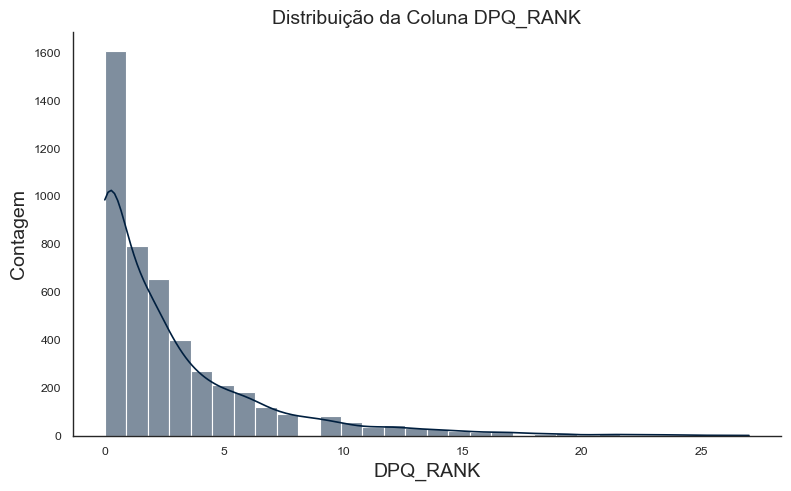

In [21]:
# Plotar um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper") 


# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA"]  # Azul marinho e cinza
sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(8,5))
sns.histplot(df['DPQ_RANK'], bins=30, kde=True)

# Melhorias de storytelling
plt.title('Distribuição da Coluna DPQ_RANK', fontsize=14)
plt.xlabel('DPQ_RANK', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
sns.despine(right=True)  # remove a borda esquerda para um visual mais limpo

plt.tight_layout()
plt.show()

Abaixo veremos como a variável correspondente à idade está distribuída.

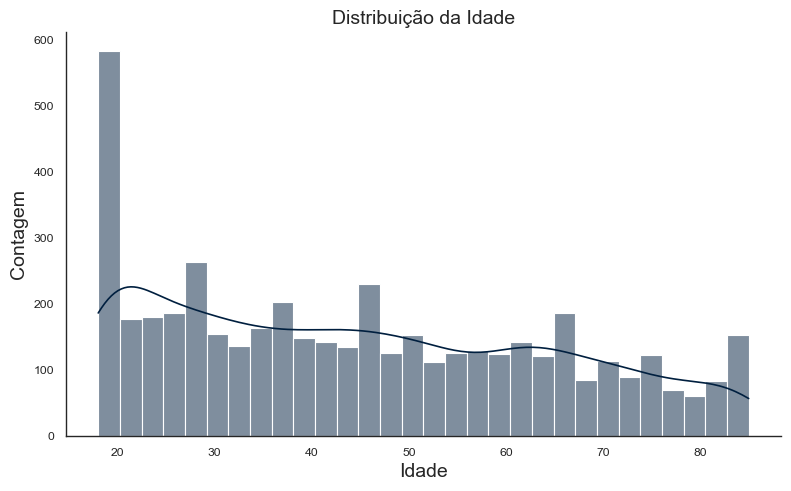

In [22]:
# Plotar um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper") 


# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(8,5))
sns.histplot(df['RIDAGEYR'], bins=30, kde=True)

# Melhorias de storytelling
plt.title('Distribuição da Idade', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
sns.despine(right=True)  # remove a borda esquerda para um visual mais limpo

plt.tight_layout()
plt.show()

In [23]:
df.RIDAGEYR.describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

Em relação à idade, temos uma distribuição mais uniforme. A média de idade é 44 anos, com mediana em 43. Nosso desvio padrão é de 19 anos. Pelo gráfico é possível notar que temos uma quantidade considerável de usuários até 20 anos.
Ademais, a idade máxima coletada foi 85 anos.


Vejamos também um histograma que reflete tempo total de atividade física praticada.

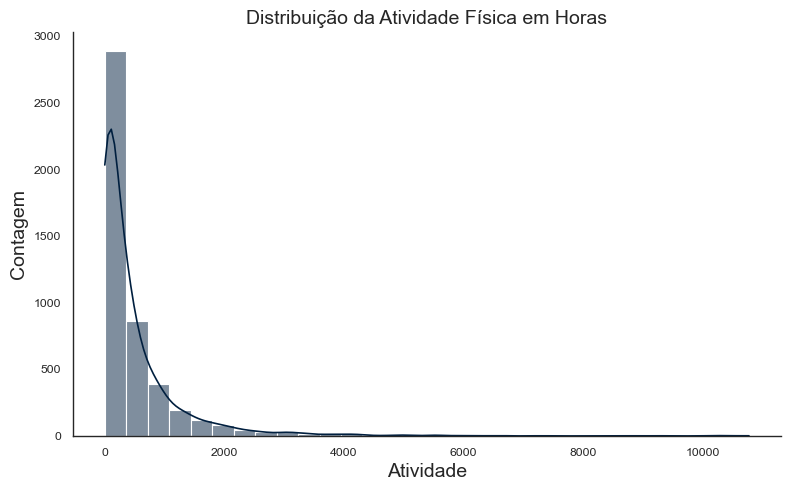

In [24]:
# Plotar um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper") 


# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(8,5))
sns.histplot(df['PAG_MINW'], bins=30, kde=True)

# Melhorias de storytelling
plt.title('Distribuição da Atividade Física em Horas', fontsize=14)
plt.xlabel('Atividade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
sns.despine(right=True)  # remove a borda esquerda para um visual mais limpo

plt.tight_layout()
plt.show()

In [25]:
df['PAG_MINW'].describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

Novamente, possuímos um gráfico com distribuição assimétrica à direita. A maior parte dos usuários praticam pouca atividade física.

#### Variáveis categóricas

Abaixo plotaremos um gráfico de barras para observar a distribuição de gênero. 

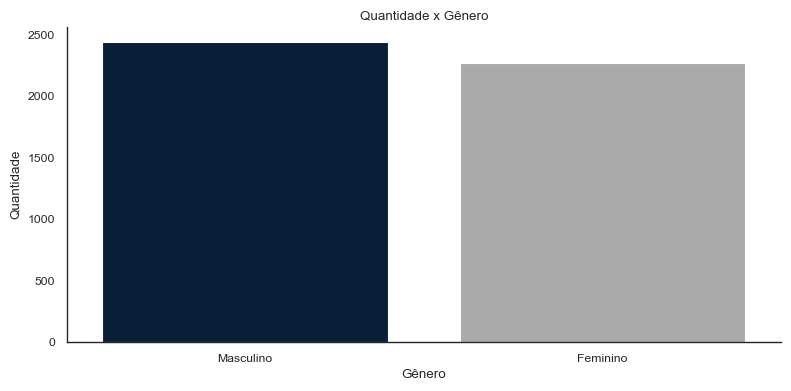

In [26]:
# Plotar um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]

sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(8, 4))
count = df['RIAGENDR'].value_counts()
sns.countplot(x='RIAGENDR', data=df, order=count.index)
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Gênero')

# Definindo os rótulos do eixo x
labels = [
    "Masculino",
    "Feminino"
]
ax.set_xticklabels(labels, ha='center')  # Ajuste a rotação conforme necessário


sns.despine(right=True)  # remove a borda esquerda para um visual mais limpo

plt.tight_layout()
plt.show();

Abaixo, veremos a quantidade de usuários por raça/etnia.

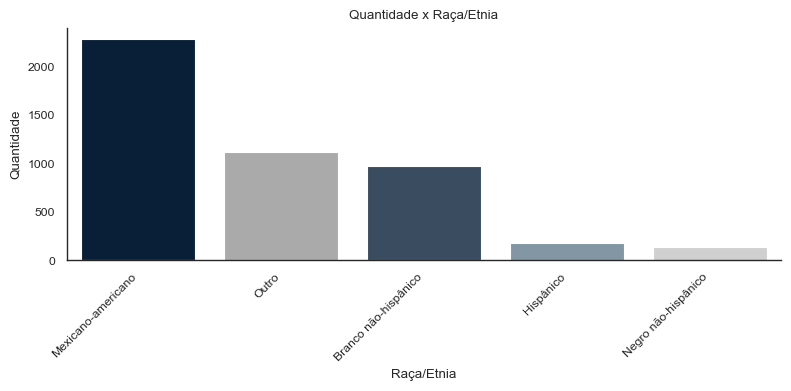

In [27]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))

# Mapeando valores
race_ethnicity_mapping = {
    1: "Branco não-hispânico",
    2: "Negro não-hispânico",
    3: "Mexicano-americano",
    4: "Outro",
    5: "Hispânico"
}
df['RIDRETH1_cat'] = df['RIDRETH1'].replace(race_ethnicity_mapping)

fig, ax = plt.subplots(figsize=(8, 4))
count = df['RIDRETH1_cat'].value_counts()
sns.countplot(x='RIDRETH1_cat', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_xlabel('Raça/Etnia')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Raça/Etnia')

ax.set_xticklabels(count.index, rotation=45, ha='right')  # Ajuste a rotação conforme necessário

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()


Podemos notar que para essa variável os dados são desbalanceados, pois há maior incidência de pessoas mexicano-americano, e pouca incidência de pessoas negras.

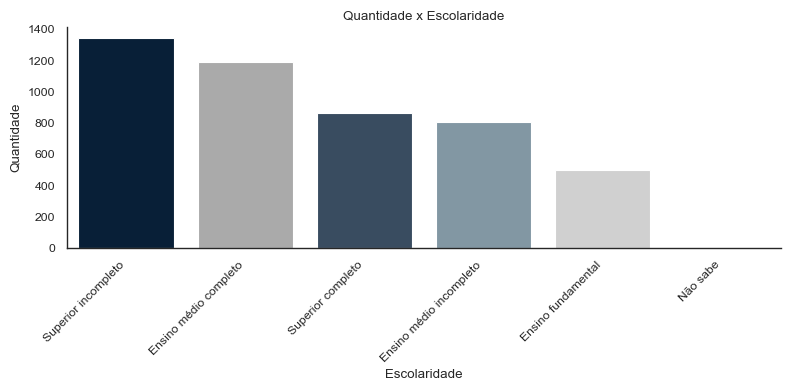

In [28]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
escolaridade_mapping = {
    1: "Ensino fundamental",
    2: "Ensino médio incompleto",
    3: "Ensino médio completo",
    4: "Superior incompleto",
    5: "Superior completo",
    9: "Não sabe"
}

df['DMDEDUC_cat'] = df['DMDEDUC'].replace(escolaridade_mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['DMDEDUC_cat'].value_counts()
sns.countplot(x='DMDEDUC_cat', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_xlabel('Escolaridade')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Escolaridade')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

É possível notar que a maioria das pessoas analisadas possuem ensino superior incompleto e ensino médio completo.

In [29]:
def categorize_income(value):
    if value in [1, 2]:
        return "Muito Baixa"
    elif value in [3, 4]:
        return "Baixa"
    elif value in [5, 6, 7]:
        return "Média"
    elif value in [8, 9, 10]:
        return "Alta"
    elif value == 11:
        return "Muito Alta"
    else:  # Valores 12, 13, 77, 99
        return "Indeterminado"

df['INDFMINC_cat'] = df['INDFMINC'].apply(categorize_income)


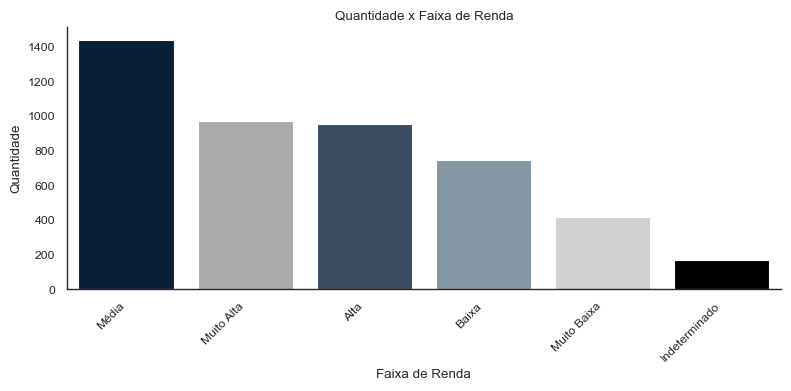

In [30]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(8, 4))
count = df['INDFMINC_cat'].value_counts()
sns.countplot(x='INDFMINC_cat', data=df, order=count.index)  # Assegurando que os dados são plotados na ordem da contagem
ax.set_xlabel('Faixa de Renda')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Faixa de Renda')


# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()


A maioria dos usuários possuem uma faixa de renda média a alta. Abaixo veremos dados relacionados ao consumo alimentício e atividade física.

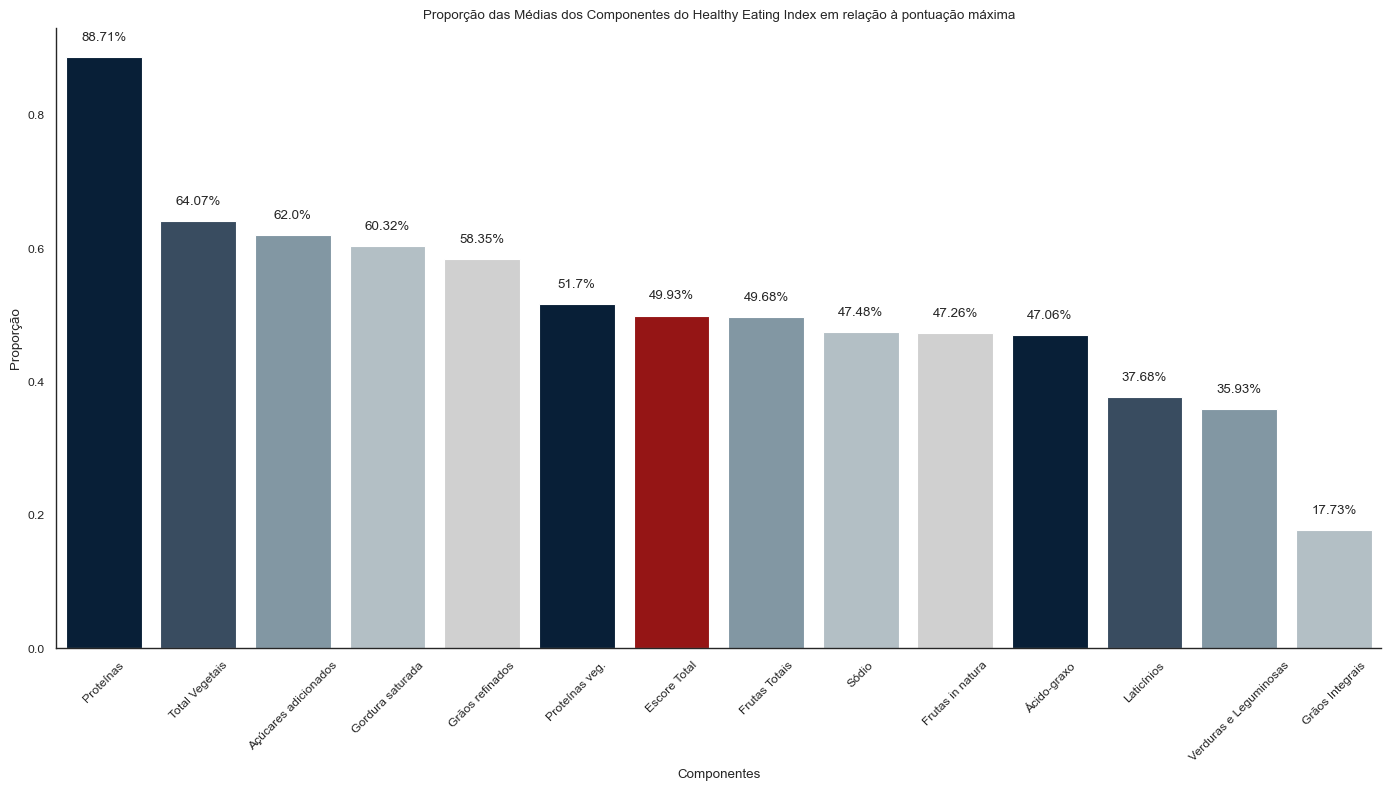

In [31]:
sns.set_style("white")
sns.set_context("paper")

# Máximos possíveis para cada componente
max_values = {
    'HEI2015C1_TOTALVEG': 5, 'HEI2015C2_GREEN_AND_BEAN': 5, 'HEI2015C3_TOTALFRUIT': 5,
    'HEI2015C4_WHOLEFRUIT': 5, 'HEI2015C5_WHOLEGRAIN': 10, 'HEI2015C6_TOTALDAIRY': 10,
    'HEI2015C7_TOTPROT': 5, 'HEI2015C8_SEAPLANT_PROT': 5, 'HEI2015C9_FATTYACID': 10,
    'HEI2015C10_SODIUM': 10, 'HEI2015C11_REFINEDGRAIN': 10, 'HEI2015C12_SFAT': 10, 
    'HEI2015C13_ADDSUG': 10, 'HEI2015_TOTAL_SCORE': 100
}

columns = list(max_values.keys())

# Calcular a proporção que a média representa da pontuação máxima possível
df_proportion = df[columns].mean() / pd.Series(max_values)

# Ordenar em ordem decrescente de proporção
df_proportion = df_proportion.sort_values(ascending=False)

# Nomes amigáveis e mapeamento para colunas
friendly_names_mapping = {
    'HEI2015C1_TOTALVEG': 'Total Vegetais',
    'HEI2015C2_GREEN_AND_BEAN': 'Verduras e Leguminosas',
    'HEI2015C3_TOTALFRUIT': 'Frutas Totais',
    'HEI2015C4_WHOLEFRUIT': 'Frutas in natura',
    'HEI2015C5_WHOLEGRAIN': 'Grãos Integrais',
    'HEI2015C6_TOTALDAIRY': 'Laticínios',
    'HEI2015C7_TOTPROT': 'Proteínas',
    'HEI2015C8_SEAPLANT_PROT': 'Proteínas veg.',
    'HEI2015C9_FATTYACID': 'Ácido-graxo',
    'HEI2015C10_SODIUM': 'Sódio',
    'HEI2015C11_REFINEDGRAIN': 'Grãos refinados',
    'HEI2015C12_SFAT': 'Gordura saturada', 
    'HEI2015C13_ADDSUG': 'Açúcares adicionados',
    'HEI2015_TOTAL_SCORE': 'Escore Total'
}

# Nomes amigáveis ordenados
ordered_names = [friendly_names_mapping[col] for col in df_proportion.index]

# Definindo a paleta de cores
colors_storytelling = ['#001F3F', '#334C66', '#7D99A8', '#B0C0C8', '#D0D0D0']
palette_ordered = {column: color for column, color in zip(df_proportion.index, colors_storytelling * 3)}

# Ajuste de cores para dar destaque ao escore total
palette_ordered['HEI2015_TOTAL_SCORE'] = '#AA0000'  # Vermelho para destaque

plt.figure(figsize=(14, 8))
sns.barplot(x=df_proportion.index, y=df_proportion.values, palette=palette_ordered)
plt.xticks(ticks=range(len(df_proportion.index)), labels=ordered_names, rotation=45)
plt.title('Proporção das Médias dos Componentes do Healthy Eating Index em relação à pontuação máxima')
plt.ylabel('Proporção')
plt.xlabel('Componentes')

# Colocando valores nas barras
for index, value in enumerate(df_proportion.values):
    plt.text(index, value + 0.02, f"{round(value*100, 2)}%", ha='center', va='bottom')

sns.despine()
plt.tight_layout()
plt.show()


Podemos perceber que há um alto consumo de proteínas, contudo, também há de açúcar, gordura saturada e grãos refinados. E baixos índices de frutas, laticínios, grãos integrais e verduras.

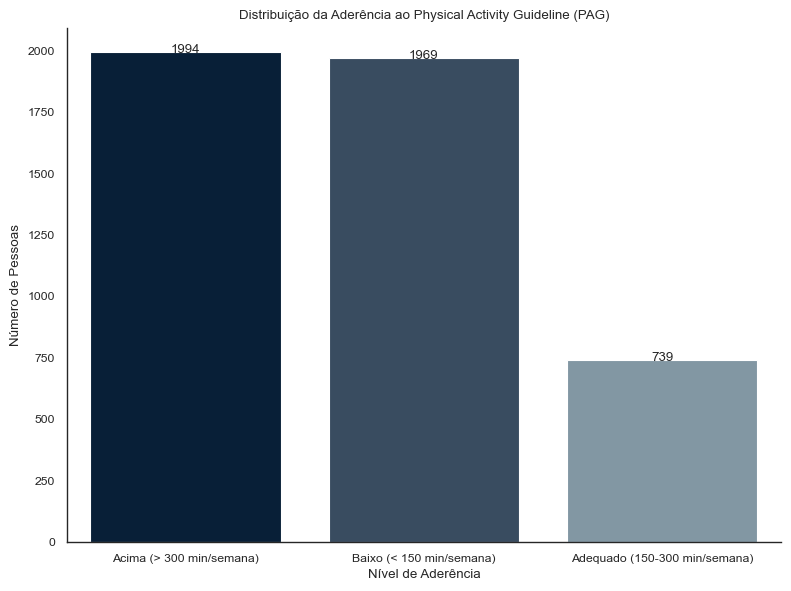

In [32]:
sns.set_style("white")
sns.set_context("paper")

colors_storytelling = ['#001F3F', '#334C66', '#7D99A8']

# Nomes amigáveis para o eixo x
friendly_names = [
    'Acima (> 300 min/semana)',
    'Baixo (< 150 min/semana)', 
    'Adequado (150-300 min/semana)' 
]

# Contagem da variável ADHERENCE
count = df['ADHERENCE'].value_counts().reindex([3, 1, 2])

plt.figure(figsize=(8,6))
sns.barplot(x=count.index, y=count.values, palette=colors_storytelling, order=[3, 1, 2])
plt.xticks(ticks=range(len(count)), labels=friendly_names)
plt.title('Distribuição da Aderência ao Physical Activity Guideline (PAG)')
plt.ylabel('Número de Pessoas')
plt.xlabel('Nível de Aderência')

# Colocando valores nas barras
for index, value in enumerate(count.values):
    plt.text(index, value + 10, str(value), ha='center', va='center')  # Ajuste a posição vertical se necessário

sns.despine()
plt.tight_layout()
plt.show()


Quanto se trata de aderência ao programa de atividade física, a maioria das pessoas tem uma aderência acima ou abaixo do esperado, e poucas possuem aderência adequada.

### ANÁLISE EXPLORATÓRIA (EDA) BIVARIADA

#### Duas variáveis numéricas

In [33]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_RANK', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat'],
      dtype='object')

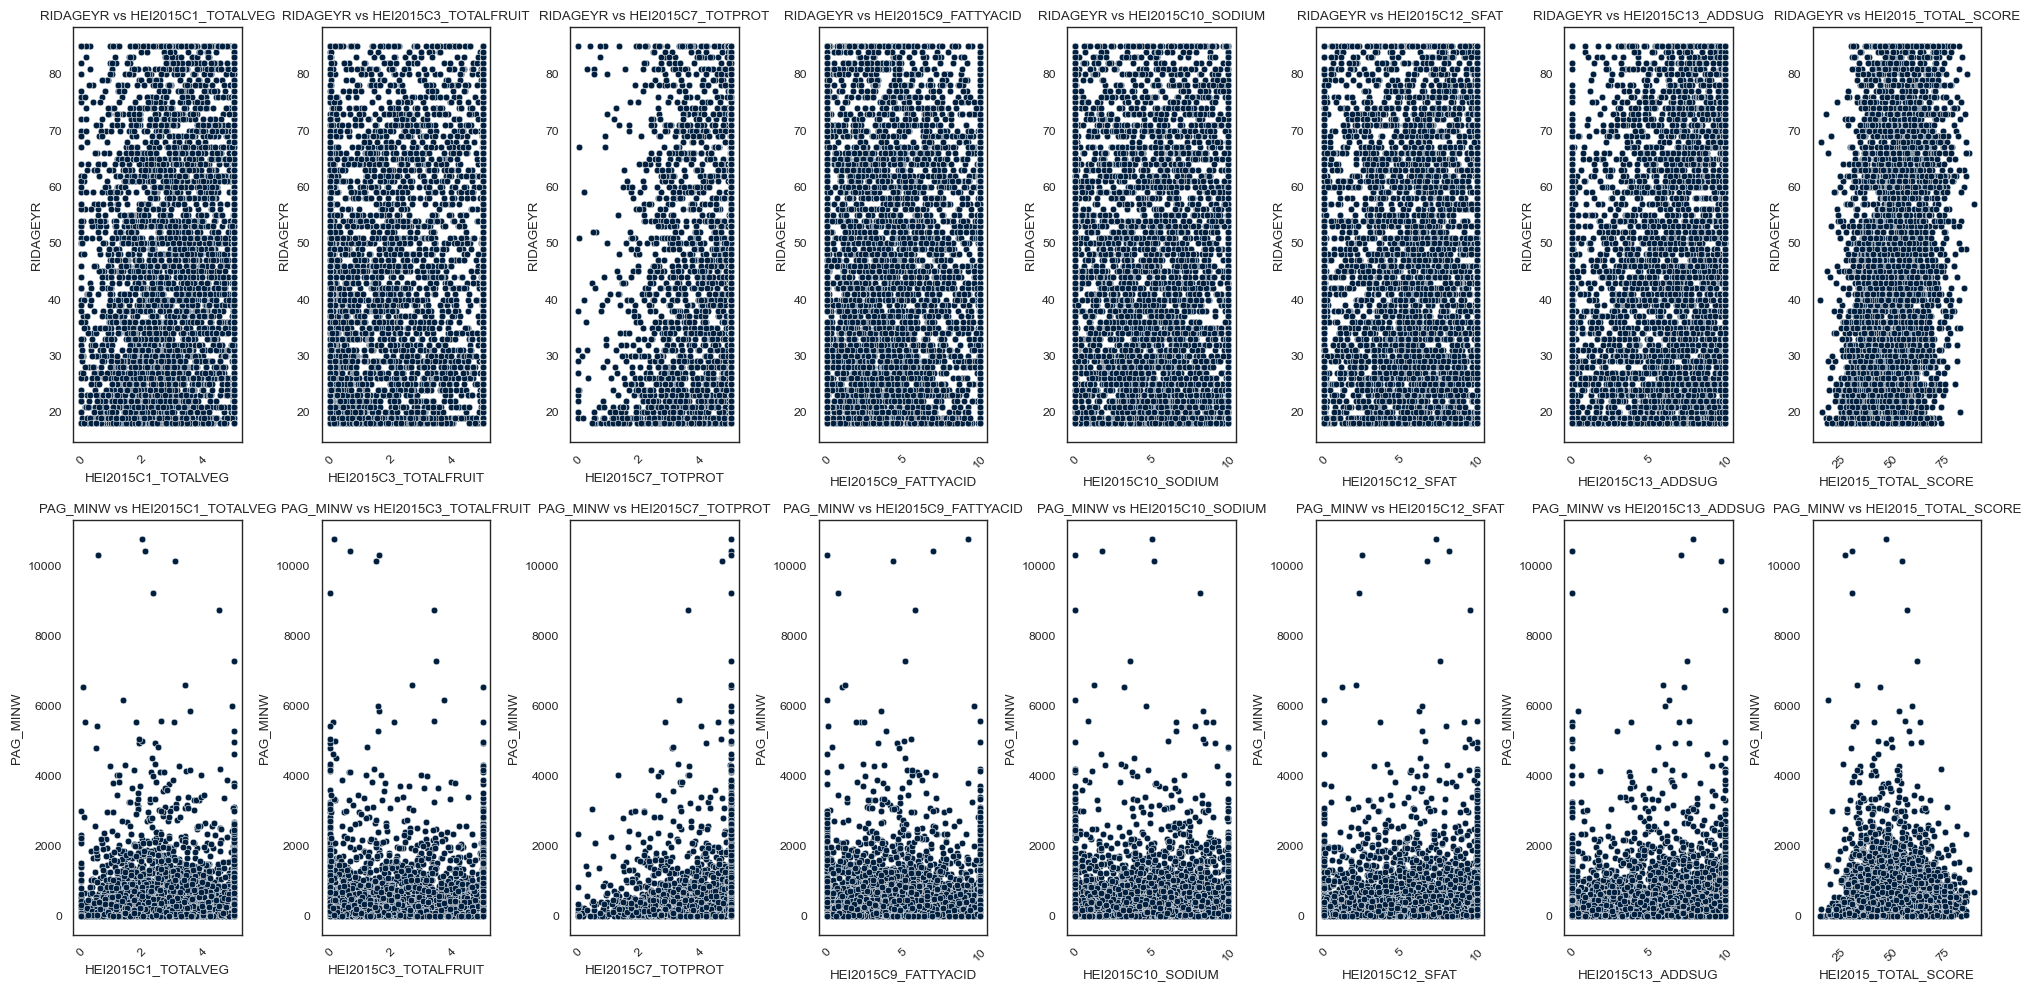

In [34]:
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#a9a9a9"]
sns.set_palette(sns.color_palette(colors))

# Definindo variáveis de interesse
vars_to_plot = ['RIDAGEYR', 'PAG_MINW']


related_vars = ['HEI2015C1_TOTALVEG','HEI2015C3_TOTALFRUIT','HEI2015C7_TOTPROT', 'HEI2015C9_FATTYACID', 
                'HEI2015C10_SODIUM','HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']

# Quantidade de linhas e colunas para subplots
nrows = len(vars_to_plot)
ncols = len(related_vars)

# Plotando
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 

for i, var in enumerate(vars_to_plot):
    for j, rel_var in enumerate(related_vars):
        if var != rel_var:
            sns.scatterplot(x=rel_var, y=var, data=df, ax=axes[i, j])
            axes[i, j].set_title(f'{var} vs {rel_var}')
            # Rotaciona a legenda
            axes[i, j].tick_params(axis='x', rotation=45)

        
plt.tight_layout()


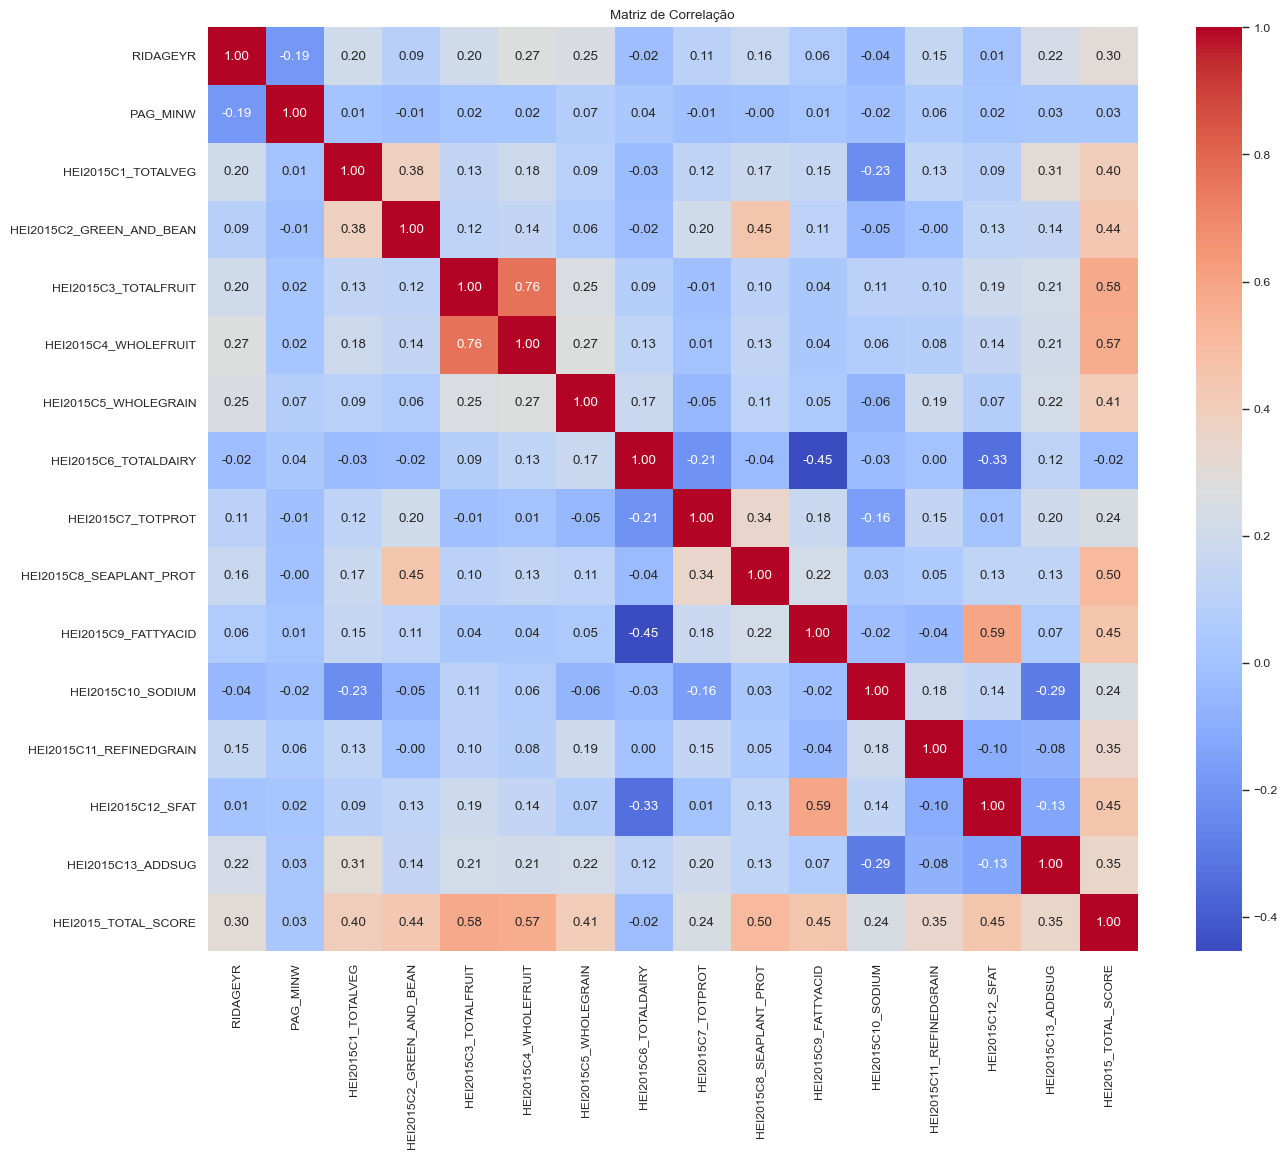

In [35]:
# Combine ambas as listas de variáveis
all_vars = ['RIDAGEYR', 'PAG_MINW',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']

# Calcule a matriz de correlação
corr_matrix = df[all_vars].corr(method = 'spearman')

# Plotando o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

#### Hipóteses

1. Há correlação entre o score de alimentação saudável e a idade?
2. Há correlação entre o score de alimentação saudável e a quantidade de exercícios físicos por semana?

Iremos realizar o teste de hipóteses para correlação de Pearson.

h0: Não há correlação significativa

ha: Há correlação significativa

In [36]:

stats.pearsonr(df.RIDAGEYR, df.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=0.29871119696688425, pvalue=1.5921344259949678e-97)

In [37]:
stats.pearsonr(df.PAG_MINW, df.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=-0.004644244728806473, pvalue=0.750198103710561)

Conclui-se que há uma correlação significativa entre idade e o score de alimentação saudável. Contudo, não podemos rejeitar a hipótese nula para quantidade de atividade física e alimentação saudável.

#### Duas variáveis categóricas.

Vejamos um gráfico de barras sobre escolaridade e renda por gênero.

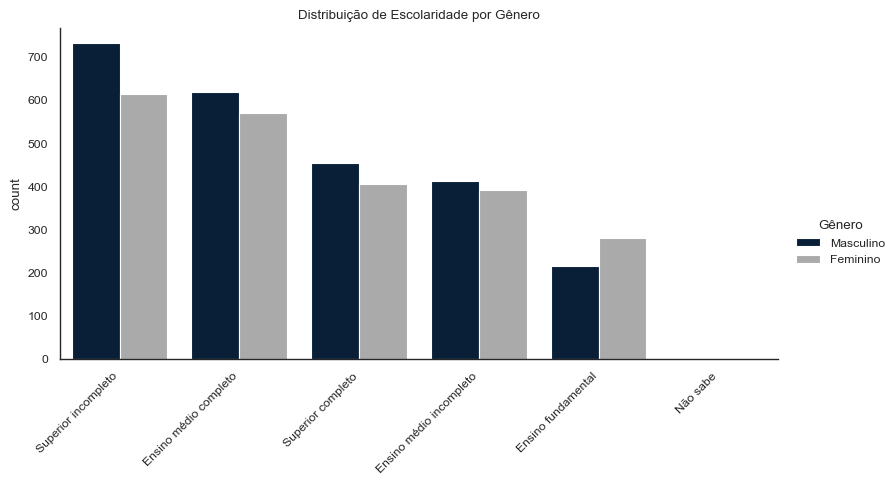

In [38]:
count = df['DMDEDUC_cat'].value_counts()
order = count.index

gender_mapping = {1: "Masculino", 2: "Feminino"}
df['RIAGENDR_cat'] = df['RIAGENDR'].replace(gender_mapping).astype('category')

# Criando o gráfico
g = sns.catplot(data=df, x="DMDEDUC_cat", hue="RIAGENDR_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Gênero")

new_labels = ["Masculino", "Feminino"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Adicionando o título
plt.title("Distribuição de Escolaridade por Gênero")
plt.show()


Iremos realizar um teste de hipóteses chi-quadrado para verificar se há associação entre as variáveis. Iremos assumir um nível de significância = 0.05.

**Hipótese Nula (H0): As duas variáveis categóricas são independentes (ou seja, não há associação entre elas).**

**Hipótese Alternativa (ha): As duas variáveis categóricas são dependentes (ou seja, há uma associação entre elas).**

Para esse caso:

h0: O gênero é independente da escolaridade. Isto é, a escolaridade não varia de acordo com o gênero.

ha: O gênero está associado à escolaridade. Isto é, a escolaridade varia de acordo com o gênero.

In [39]:


# Criando uma tabela de contingência
table = pd.crosstab(df['DMDEDUC_cat'], df['RIAGENDR_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 18.880052780225615
Valor p: 0.0020235560731163304
Coeficiente de Cramér (V): 0.0634


Como o p-valor é menor que o nível de significância, podemos rejeitar a H0. Contudo, ao verificar a magnitude do efeito, podemos observar que o mesmo é muito pequeno.

Faremos o mesmo para renda e gênero.

**H0**: O gênero é independente da renda. Isto é, a renda não varia de acordo com o gênero.

**Ha**: O gênero está associado à renda. Isto é, a renda varia de acordo com o gênero.

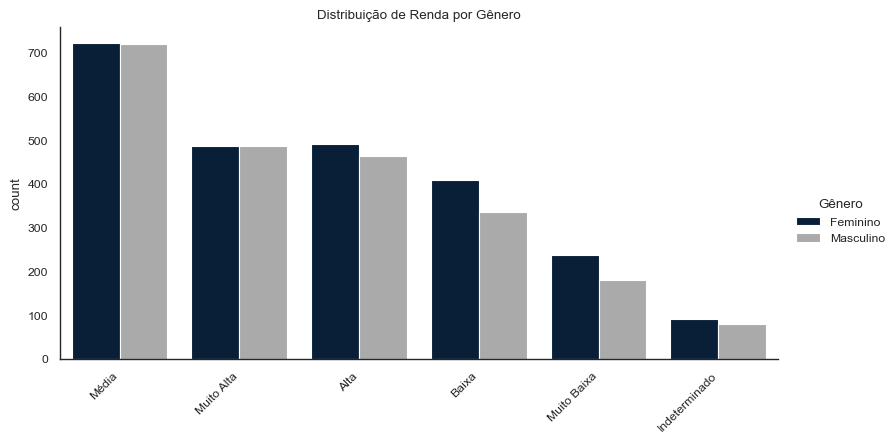

In [40]:
count = df['INDFMINC_cat'].value_counts()
order = count.index

# Criando o gráfico
g = sns.catplot(data=df, x="INDFMINC_cat", hue="RIAGENDR_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Gênero")


# Adicionando o título
plt.title("Distribuição de Renda por Gênero")
plt.show()


In [41]:
# Criando uma tabela de contingência
table = pd.crosstab(df['INDFMINC_cat'], df['RIAGENDR_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)


Valor qui-quadrado: 10.015679623513124
Valor p: 0.07479218809287837


Como o p-valor > nível de significância, não rejeitamos a hipótese nula.

Vejamos abaixo para escolaridade e raça/etnia.

**H0**: A escolaridade é independente da raça/etnia. Isto é, a escolaridade não varia de acordo com a raça/etnia.

**Ha**: A escolaridade está associado à raça/etnia. Isto é, a escolaridade varia de acordo com a raça/etnia.

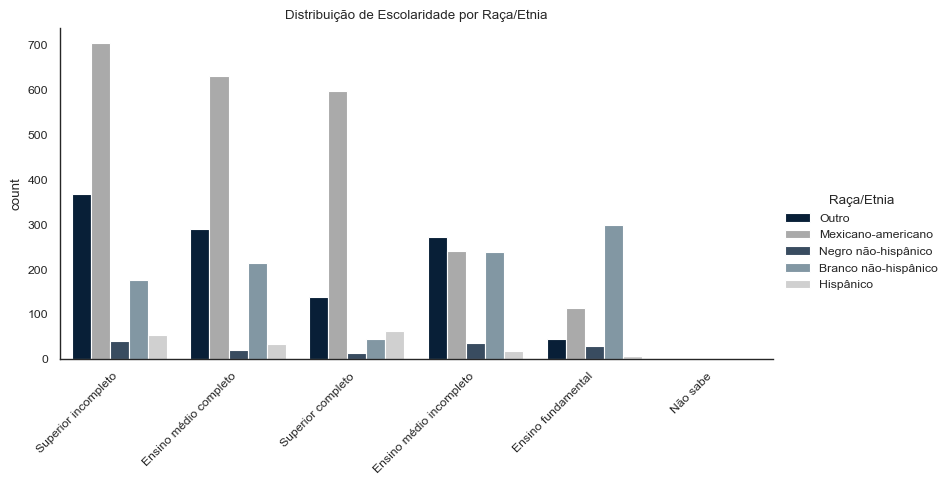

In [42]:
count = df['DMDEDUC_cat'].value_counts()
order = count.index

# Criando o gráfico
g = sns.catplot(data=df, x="DMDEDUC_cat", hue="RIDRETH1_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Raça/Etnia")


# Adicionando o título
plt.title("Distribuição de Escolaridade por Raça/Etnia")
plt.show()


In [43]:
# Criando uma tabela de contingência
table = pd.crosstab(df['DMDEDUC_cat'], df['RIDRETH1_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 937.3671187796466
Valor p: 8.70709280288252e-186
Coeficiente de Cramér (V): 0.2232


Nosso p-valor é bem menor que o nível de signficância, portanto a 95% de nível de confiância (e até mais), rejeitamos a hipótese nula.
Abaixo, veremos para renda e raça/etnia.

**H0**: A renda é independente da raça/etnia. Isto é, a renda não varia de acordo com a raça/etnia.

**Ha**: A renda está associado à raça/etnia. Isto é, a renda varia de acordo com a raça/etnia.

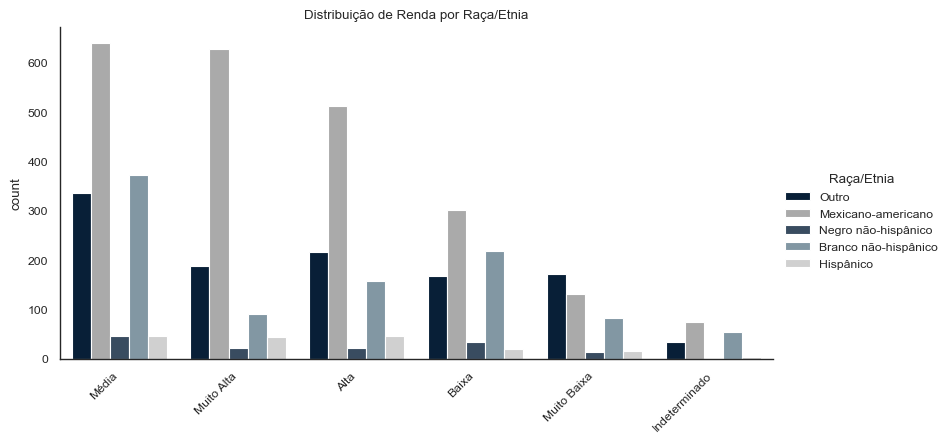

In [44]:
count = df['INDFMINC_cat'].value_counts()
order = count.index

# Criando o gráfico
g = sns.catplot(data=df, x="INDFMINC_cat", hue="RIDRETH1_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Raça/Etnia")


# Adicionando o título
plt.title("Distribuição de Renda por Raça/Etnia")
plt.show()


In [45]:
# Criando uma tabela de contingência
table = pd.crosstab(df['INDFMINC_cat'], df['RIDRETH1_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 303.2943179000313
Valor p: 1.716338909107887e-52
Coeficiente de Cramér (V): 0.1270


Novamente, nosso p-valor é menor que o nível de significância, então rejeitamos a hipótese nula.

Vejamos agora em relação à aderência a atividade física e à pergunta:
    
DPQ040: Nas últimas 2 semanas, com que frequência você se sentiu cansado(a) ou com pouca energia?

In [46]:
DPQ040_mapping = {
    0: "Nenhuma vez",
    1: "Menos de uma semana",
    2: "Uma semana ou mais",
    3: "Quase todos os dias",
}
df['DPQ040_cat'] = df['DPQ040'].replace(DPQ040_mapping)

In [47]:
aderencia_mapping = {
    1: "Baixa",
    2: "Adequada",
    3: "Acima",
}

df['ADHERENCE_cat'] = df['ADHERENCE'].replace(aderencia_mapping)

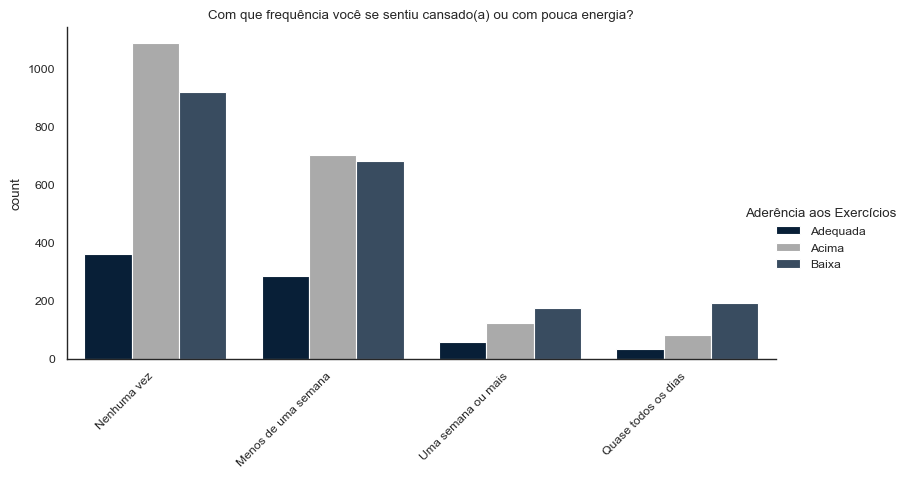

In [48]:
count = df['DPQ040_cat'].value_counts()
order = count.index

# Criando o gráfico
g = sns.catplot(data=df, x="DPQ040_cat", hue="ADHERENCE_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Aderência aos Exercícios")


# Adicionando o título
plt.title("Com que frequência você se sentiu cansado(a) ou com pouca energia?")
plt.show()


In [49]:
# Criando uma tabela de contingência
table = pd.crosstab(df['DPQ040_cat'], df['ADHERENCE_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 77.70180535557223
Valor p: 1.0650918553657701e-14
Coeficiente de Cramér (V): 0.0909


Nosso p-valor é menor que o nível de significância, enão rejeita-se a hipótese nula, contudo o efeito observado é pequeno.

Vejamos agora sobre renda e a pergunta:
    
DPQ090: Nas últimas 2 semanas, com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?

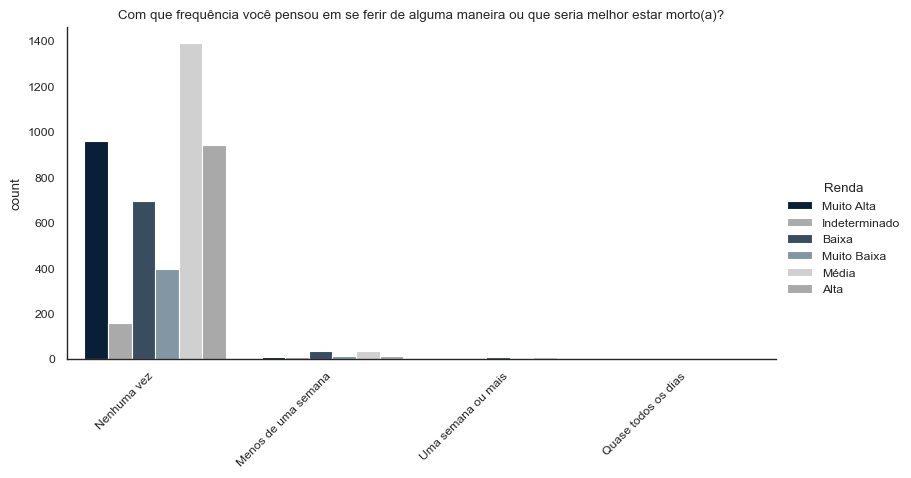

In [50]:
df['DPQ090_cat'] = df['DPQ090'].replace(DPQ040_mapping)

# Criando o gráfico
g = sns.catplot(data=df, x="DPQ090_cat", hue="INDFMINC_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Renda")


# Adicionando o título
plt.title("Com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?")
plt.show()


In [51]:
# Criando uma tabela de contingência
table = pd.crosstab(df['DPQ090_cat'], df['INDFMINC_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 62.689760379224396
Valor p: 8.64603949121032e-08
Coeficiente de Cramér (V): 0.0667


Nosso p-valor é menor que o nível de significância, enão rejeita-se a hipótese nula, contudo o efeito observado é pequeno.

Gênero e a pergunta:
    
DPQ060: Nas últimas 2 semanas, com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?

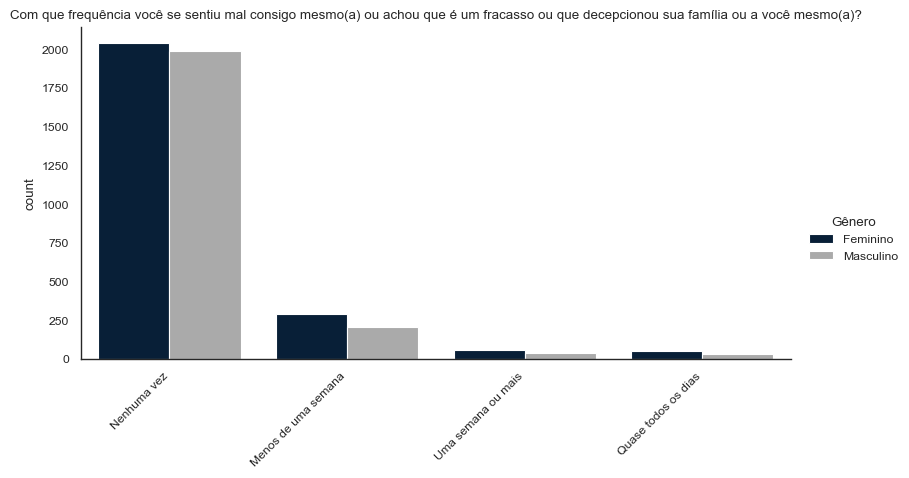

In [52]:
df['DPQ060_cat'] = df['DPQ060'].replace(DPQ040_mapping)

# Criando o gráfico
g = sns.catplot(data=df, x="DPQ060_cat", hue="RIAGENDR_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Gênero")


# Adicionando o título
plt.title("Com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?")
plt.show()


In [53]:
# Criando uma tabela de contingência
table = pd.crosstab(df['DPQ060_cat'], df['RIAGENDR_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")


Valor qui-quadrado: 16.112124740569072
Valor p: 0.0010755118838349207
Coeficiente de Cramér (V): 0.0585


Nosso p-valor é menor que o nível de significância, enão rejeita-se a hipótese nula, contudo o efeito observado é pequeno.

#### Categórica e Numérica

In [54]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_RANK', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat', 'RIAGENDR_cat',
       'DPQ040_cat', 'ADHERENCE_cat', 'DPQ090_cat', 'DPQ060_cat'],
      dtype='object')

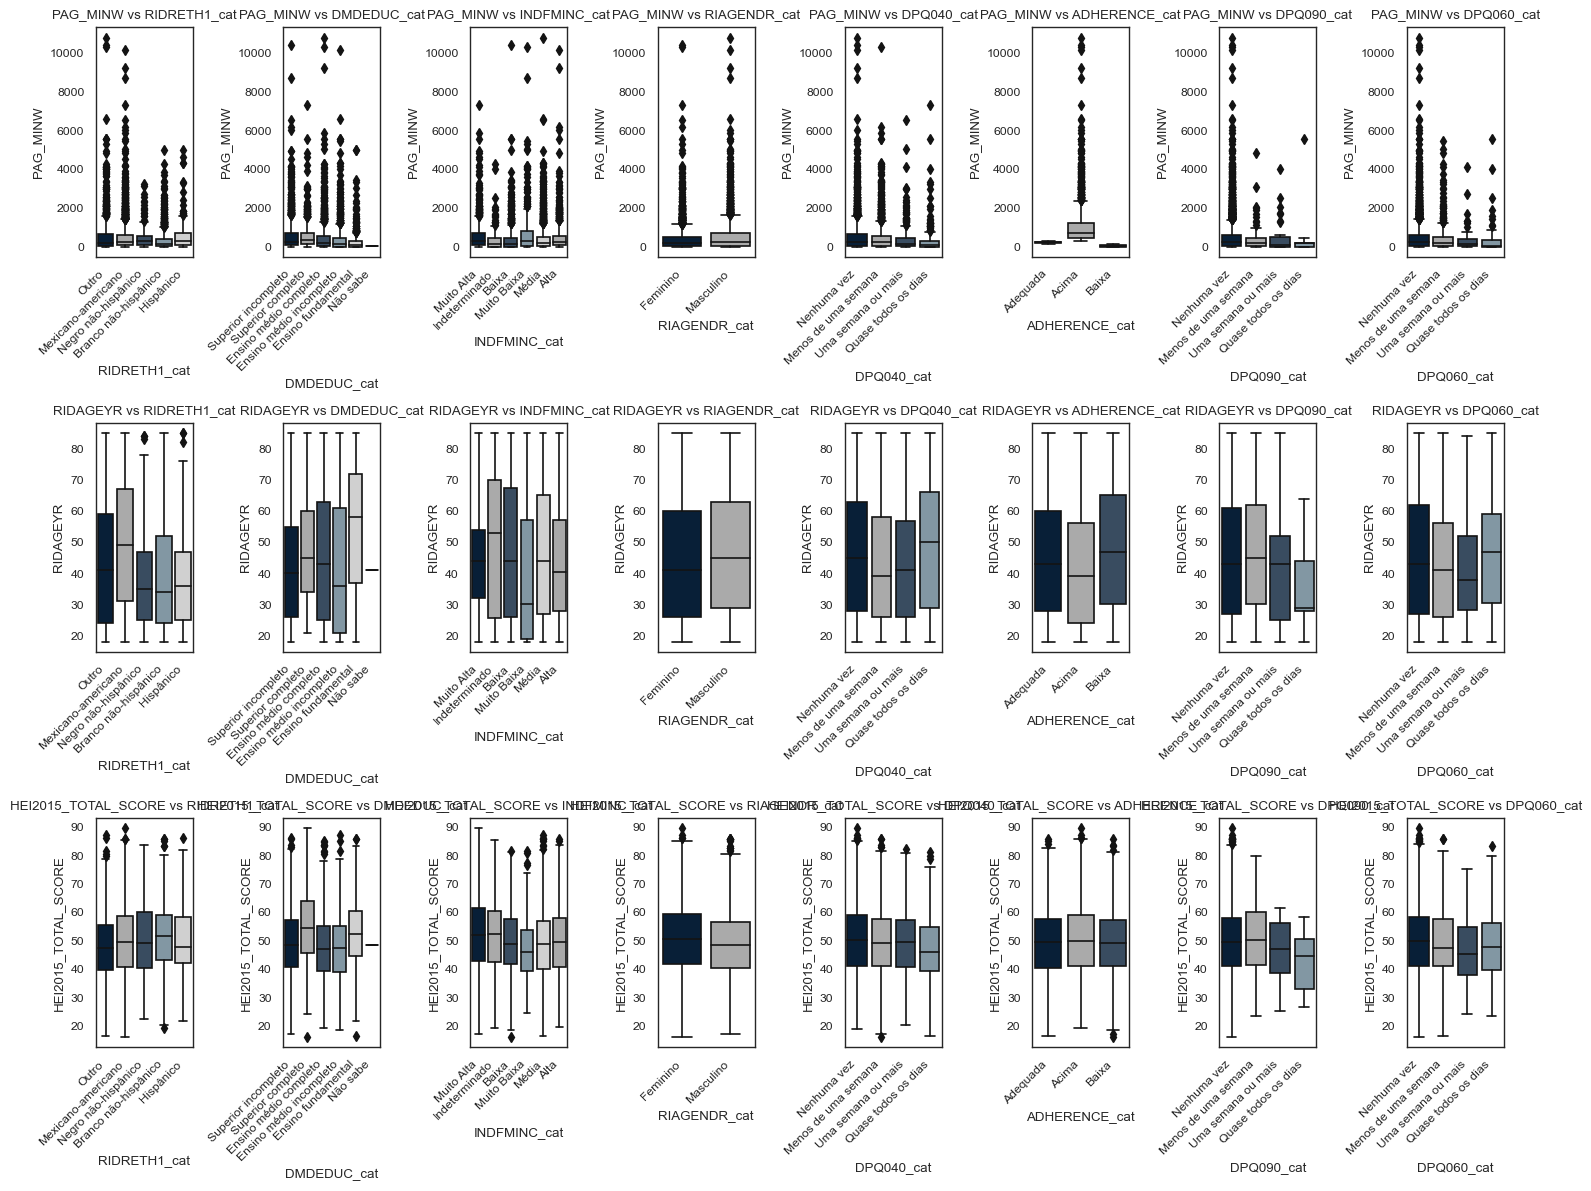

In [55]:
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#a9a9a9"]
sns.set_palette(sns.color_palette(colors))

# Definindo variáveis de interesse
vars_to_plot = ['PAG_MINW', 'RIDAGEYR', 'HEI2015_TOTAL_SCORE']

# Variáveis que você deseja relacionar
related_vars = ['RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat', 'RIAGENDR_cat',
       'DPQ040_cat', 'ADHERENCE_cat', 'DPQ090_cat', 'DPQ060_cat']

# Quantidade de linhas e colunas para subplots
nrows = len(vars_to_plot)
ncols = len(related_vars)

# Plotando
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 

for i, var in enumerate(vars_to_plot):
    for j, rel_var in enumerate(related_vars):
        sns.boxplot(x=rel_var, y=var, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{var} vs {rel_var}')
        # Rotaciona a legenda
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')
        
plt.tight_layout()


#### Variável alvo e demais

In [56]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_RANK', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat', 'RIAGENDR_cat',
       'DPQ040_cat', 'ADHERENCE_cat', 'DPQ090_cat', 'DPQ060_cat'],
      dtype='object')

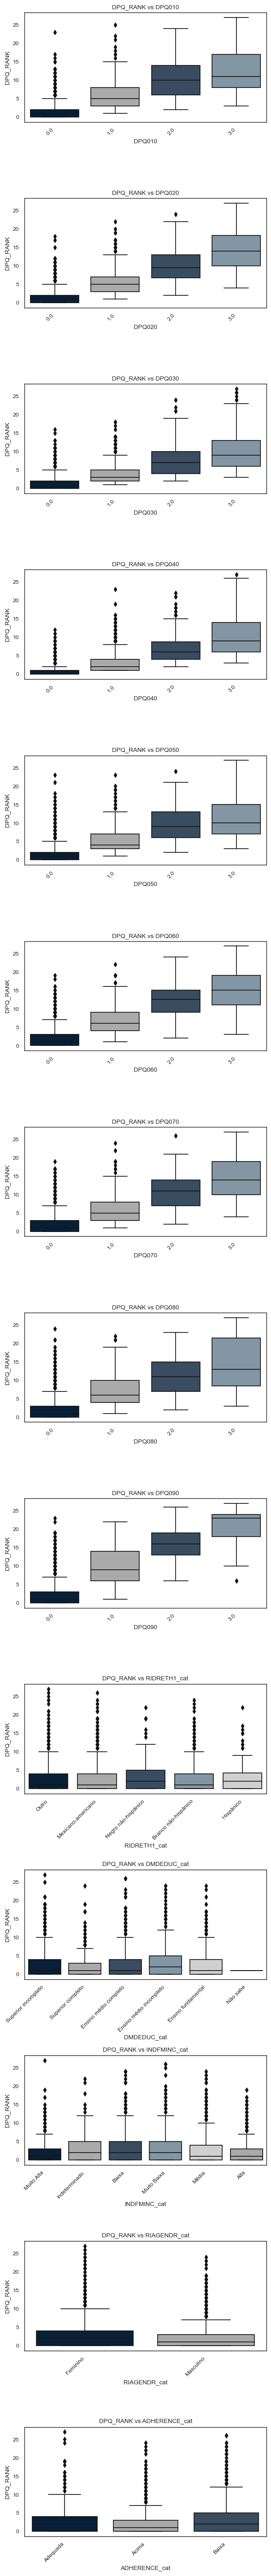

In [57]:
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#a9a9a9"]
sns.set_palette(sns.color_palette(colors))

# Definindo variável de interesse
var_to_plot = 'DPQ_RANK'

# Variáveis que você deseja relacionar
related_vars = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat', 
    'RIAGENDR_cat', 'ADHERENCE_cat']

# Quantidade de linhas e colunas para subplots
nrows = len(related_vars)
ncols = 1

# Plotando
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4*nrows))

# Garantir que axes seja sempre bidimensional
if nrows == 1:
    axes = np.array([axarr])
else:
    axes = axarr

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 

for i, rel_var in enumerate(related_vars):
    ax = axes[i]
    sns.boxplot(x=rel_var, y=var_to_plot, data=df, ax=ax)
    ax.set_title(f'{var_to_plot} vs {rel_var}')
    # Rotaciona a legenda
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
plt.tight_layout()
plt.show()

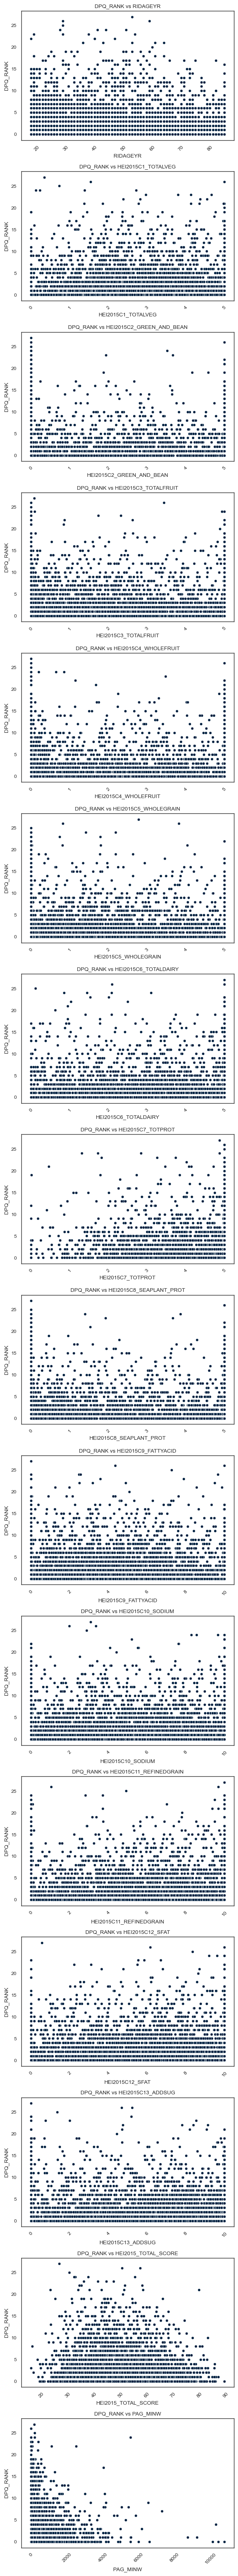

In [58]:
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#a9a9a9"]
sns.set_palette(sns.color_palette(colors))

# Definindo variável de interesse
var_to_plot = 'DPQ_RANK'

# Variáveis que você deseja relacionar
related_vars = ['RIDAGEYR',  'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'PAG_MINW']

# Quantidade de linhas e colunas para subplots
nrows = len(related_vars)
ncols = 1

# Plotando
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4*nrows))

# Garantir que axes seja sempre bidimensional
if nrows == 1:
    axes = np.array([axarr])
else:
    axes = axarr

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 

for i, rel_var in enumerate(related_vars):
    ax = axes[i]
    sns.scatterplot(x=rel_var, y=var_to_plot, data=df, ax=ax)
    ax.set_title(f'{var_to_plot} vs {rel_var}')
    # Rotaciona a legenda
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
plt.tight_layout()
plt.show()

#### Hipóteses:

1. A média do `DPQ_RANK` varia conforme o gênero?

In [59]:
DPQ_RANK_h = df['DPQ_RANK'].loc[df['RIAGENDR_cat'] == 'Masculino']
DPQ_RANK_m = df['DPQ_RANK'].loc[df['RIAGENDR_cat'] == 'Feminino']

In [61]:
# Realizando o teste t para amostras independentes
t_stat, p_value = ttest_ind(DPQ_RANK_h, DPQ_RANK_m)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os grupos.")
    

def compute_ci(data, alpha=0.05):
    """Calcula o intervalo de confiança para a média de um conjunto de dados."""
    n = len(data)
    mean = np.mean(data)
    se = sem(data)  # Erro padrão
    df = n - 1
    ci = stats.t.interval(1-alpha, df, loc=mean, scale=se)
    return mean, ci

mean_h, ci_h = compute_ci(DPQ_RANK_h)
mean_m, ci_m = compute_ci(DPQ_RANK_m)

print(f"Média do DPQ_RANK para Homens: {mean_h:.2f}, IC: ({ci_h[0]:.2f}, {ci_h[1]:.2f})")
print(f"Média do DPQ_RANK para Mulheres: {mean_m:.2f}, IC: ({ci_m[0]:.2f}, {ci_m[1]:.2f})")

t-statistic: -7.49845291143233
p-value: 7.675103240709812e-14
Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.
Média do DPQ_RANK para Homens: 2.31, IC: (2.17, 2.45)
Média do DPQ_RANK para Mulheres: 3.13, IC: (2.97, 3.28)


Os resultados indicam que, em termos de DPQ_RANK, há uma diferença significativa entre homens e mulheres, com mulheres tendo uma pontuação média mais alta em comparação aos homens.

2. A média do `DPQ_RANK` varia conforme a escolaridade?


In [62]:
superior_incompleto = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Superior incompleto']
ensino_medio_completo = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Ensino médio completo']
superior_completo = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Superior completo']
ensino_medio_incompleto = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Ensino médio incompleto']
fundamental = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Ensino fundamental']
nao_sabe = df['DPQ_RANK'].loc[df['DMDEDUC_cat'] == 'Não sabe']

In [63]:

# Realizando a ANOVA
f_stat, p_value = f_oneway(superior_incompleto, ensino_medio_completo, superior_completo, ensino_medio_incompleto, fundamental, nao_sabe)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os grupos.")



f-statistic: 9.690874918955176
p-value: 3.200709294923921e-09
Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.


In [64]:
tukey = pairwise_tukeyhsd(endog=df['DPQ_RANK'],groups=df['DMDEDUC_cat'], alpha=0.05) 
print(tukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------
     Ensino fundamental   Ensino médio completo  -0.2447 0.8225  -0.8121  0.3227  False
     Ensino fundamental Ensino médio incompleto   0.0553 0.9998  -0.5507  0.6612  False
     Ensino fundamental                Não sabe  -2.0986 0.9934 -12.7345  8.5374  False
     Ensino fundamental       Superior completo  -1.0823    0.0  -1.6809 -0.4838   True
     Ensino fundamental     Superior incompleto   -0.395 0.3313  -0.9527  0.1627  False
  Ensino médio completo Ensino médio incompleto   0.2999  0.489  -0.1847  0.7846  False
  Ensino médio completo                Não sabe  -1.8539 0.9963 -12.4836  8.7758  False
  Ensino médio completo       Superior completo  -0.8376    0.0  -1.3129 -0.3623   True
  Ensino médio completo     Supe

Há diferença no DPQ_RANK para:
1. Ensino fundamental e superior completo
2. Ensino médio completo e Superior completo
3. Ensino médio incompleto e Superior completo
4. Superior completo e Superior incompleto

Vejamos as médias:

In [65]:
print("Média do DPQ para Ensino Fundamental:",fundamental.mean().round(2))
print("Média do DPQ para Ensino Médio Completo:",ensino_medio_completo.mean().round(2))
print("Média do DPQ para Ensino Médio Inompleto:",ensino_medio_incompleto.mean().round(2))
print("Média do DPQ para Superior Completo:",superior_completo.mean().round(2))
print("Média do DPQ para Superior Inompleto:",superior_incompleto.mean().round(2))

Média do DPQ para Ensino Fundamental: 3.1
Média do DPQ para Ensino Médio Completo: 2.85
Média do DPQ para Ensino Médio Inompleto: 3.15
Média do DPQ para Superior Completo: 2.02
Média do DPQ para Superior Inompleto: 2.7


3. A média do `DPQ_RANK` varia conforme a raça/etnia?


In [66]:
mex_amr = df['DPQ_RANK'].loc[df['RIDRETH1_cat'] == 'Mexicano-americano']
outro = df['DPQ_RANK'].loc[df['RIDRETH1_cat'] == 'Outro']
branco = df['DPQ_RANK'].loc[df['RIDRETH1_cat'] == 'Branco não-hispânico']
hispanico = df['DPQ_RANK'].loc[df['RIDRETH1_cat'] == 'Hispânico']
negro = df['DPQ_RANK'].loc[df['RIDRETH1_cat'] == 'Negro não-hispânico']

In [67]:
# Realizando a ANOVA
f_stat, p_value = f_oneway(mex_amr, outro, branco, hispanico, negro)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os grupos.")


f-statistic: 2.3899010787592045
p-value: 0.04869122994870757
Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.


O p-valor é 0.048, muito próximo do nível de significância. Contudo, se realizarmos o teste de Tukey, veremos que não há diferença significativa entre os grupos.

In [68]:
tukey = pairwise_tukeyhsd(endog=df['DPQ_RANK'],groups=df['RIDRETH1_cat'], alpha=0.05) 
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
Branco não-hispânico           Hispânico    0.149 0.9882 -0.6794 0.9774  False
Branco não-hispânico  Mexicano-americano  -0.1303 0.8929 -0.5209 0.2602  False
Branco não-hispânico Negro não-hispânico   0.6642 0.2747 -0.2501 1.5786  False
Branco não-hispânico               Outro   0.1581 0.8713 -0.2895 0.6057  False
           Hispânico  Mexicano-americano  -0.2793 0.8712 -1.0698 0.5112  False
           Hispânico Negro não-hispânico   0.5153 0.7343 -0.6286 1.6591  False
           Hispânico               Outro   0.0091    1.0  -0.811 0.8293  False
  Mexicano-americano Negro não-hispânico   0.7946 0.0992 -0.0856 1.6748  False
  Mexicano-americano               Outro   0.2885 0.2153 -0.0844 0.6613  False
 Negro não-hispânico               Outro  -0.5061 0.

4. A média do `DPQ_RANK` varia conforme a renda?


In [69]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_RANK', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat', 'RIAGENDR_cat',
       'DPQ040_cat', 'ADHERENCE_cat', 'DPQ090_cat', 'DPQ060_cat'],
      dtype='object')

In [70]:
df.INDFMINC_cat.value_counts()

Média            1441
Muito Alta        973
Alta              956
Baixa             744
Muito Baixa       417
Indeterminado     171
Name: INDFMINC_cat, dtype: int64

In [71]:
media = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Média']
mtalta = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Muito Alta']
alta = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Alta']
baixa = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Baixa']
mtbaixa = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Muito Baixa']
ind = df['DPQ_RANK'].loc[df['INDFMINC_cat'] == 'Indeterminado']


In [72]:
# Realizando a ANOVA
f_stat, p_value = f_oneway(media, mtalta, alta, baixa, mtbaixa, ind)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if round(p_value,2) < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os grupos.")


f-statistic: 24.632133738415455
p-value: 1.429650077276925e-24
Rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.


In [73]:
tukey = pairwise_tukeyhsd(endog=df['DPQ_RANK'],groups=df['INDFMINC_cat'], alpha=0.05) 
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         Alta         Baixa   1.2602    0.0  0.7448  1.7757   True
         Alta Indeterminado   0.7697 0.1222 -0.1057   1.645  False
         Alta    Muito Alta  -0.2815 0.5507 -0.7616  0.1986  False
         Alta   Muito Baixa   1.4801    0.0  0.8613  2.0988   True
         Alta         Média   0.2828 0.4441 -0.1569  0.7226  False
        Baixa Indeterminado  -0.4906 0.6223 -1.3846  0.4035  False
        Baixa    Muito Alta  -1.5418    0.0 -2.0552 -1.0283   True
        Baixa   Muito Baixa   0.2198  0.927 -0.4251  0.8647  False
        Baixa         Média  -0.9774    0.0 -1.4534 -0.5015   True
Indeterminado    Muito Alta  -1.0512 0.0081 -1.9254  -0.177   True
Indeterminado   Muito Baixa   0.7104 0.2793  -0.247  1.6677  False
Indeterminado         Média  -0.4868 0.5801 -1.3395  0.3659  F

Há diferença no DPQ_RANK para:
1. Renda Alta e Baixa
2. Renda Alta e Muito Baixa
5. Renda Muito Alta e Baixa
5. Renda Muito Alta e Muito Baixa
5. Renda Muito Alta e Média
4. Renda Baixa e Média
4. Renda Muito Baixa e Média

In [74]:
print("Média do DPQ para Renda Alta:",alta.mean().round(2))
print("Média do DPQ para Renda  Muito Alta:",mtalta.mean().round(2))
print("Média do DPQ para Renda Baixa:",baixa.mean().round(2))
print("Média do DPQ para Renda Muito Baixa:",mtbaixa.mean().round(2))
print("Média do DPQ para Renda Média:",media.mean().round(2))

Média do DPQ para Renda Alta: 2.35
Média do DPQ para Renda  Muito Alta: 2.07
Média do DPQ para Renda Baixa: 3.61
Média do DPQ para Renda Muito Baixa: 3.83
Média do DPQ para Renda Média: 2.63


5. Há correlação entre o `DPQ_RANK` e a ingestão de proteínas?


In [75]:
stats.pearsonr(df.DPQ_RANK, df.HEI2015C7_TOTPROT)

PearsonRResult(statistic=-0.05924679819772615, pvalue=4.800963933060957e-05)

6. Há correlação entre o `DPQ_RANK` e a ingestão de açúcar?


In [76]:
stats.pearsonr(df.DPQ_RANK, df.HEI2015C13_ADDSUG)

PearsonRResult(statistic=-0.08475953454485972, pvalue=5.850049565053978e-09)

7. Há correlação entre o `DPQ_RANK` e o score de alimentação saudável?


In [77]:
stats.pearsonr(df.DPQ_RANK, df.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=-0.07094563824018385, pvalue=1.1178707450841809e-06)

8. Há correlação entre o `DPQ_RANK` e a idade?


In [78]:
stats.pearsonr(df.DPQ_RANK, df.RIDAGEYR)

PearsonRResult(statistic=-0.036468746346358584, pvalue=0.012388858956978265)

9. Há correlação entre o `DPQ_RANK` e a quantidade de exercício físico semanal?

In [79]:
stats.pearsonr(df.DPQ_RANK, df.PAG_MINW)

PearsonRResult(statistic=-0.05666400170732641, pvalue=0.00010123812104228653)

Para todos, obtivemos uma correlação  estatisticamente significativa, porém fraca.

### Regressão Linear

Por fim, iremos realizar uma regressão linear para prever a variável `DPQ_RANK`.

Já checamos a linearidade acima, agora iremos verificar a multicolinearidade.

In [80]:
df_copy = df[['HEI2015_TOTAL_SCORE', 'DPQ_RANK', 'PAG_MINW', 'RIDAGEYR']].copy()

In [81]:

X = df_copy.copy()

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

Variable       VIF
0  HEI2015_TOTAL_SCORE  7.355066
1             DPQ_RANK  1.457442
2             PAG_MINW  1.359568
3             RIDAGEYR  6.379548

Iremos centralizar as variáveis a fim de ajustar o VIF.

In [83]:
#centrando variáveis numéricas

df_center = pd.DataFrame()

for col in X:
    df_center[col] = df[col] - df[col].mean()


In [84]:

X = df_center

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

Variable       VIF
0  HEI2015_TOTAL_SCORE  1.104184
1             DPQ_RANK  1.009018
2             PAG_MINW  1.030939
3             RIDAGEYR  1.128511

Abaixo, irei adicionar as variáveis categóricas.

In [85]:
def clean_column_name(name):
    # Remove caracteres especiais e espaços
    cleaned_name = re.sub(r'[^A-Za-z0-9]+', '', name)
    return cleaned_name


In [86]:
df_center['RIAGENDR_cat'] = df['RIAGENDR_cat']
df_center['DMDEDUC_cat'] = df['DMDEDUC_cat']
df_center['RIDRETH1_cat'] = df['RIDRETH1_cat']
df_center['INDFMINC_cat'] = df['INDFMINC_cat']
df_center['ADHERENCE_cat'] = df['ADHERENCE_cat']

dummies = pd.get_dummies(df_center['RIAGENDR_cat'], drop_first=True).rename(columns=lambda x: 'genero_' + clean_column_name(str(x)))
df_center = pd.concat([df_center, dummies], axis=1)

dummies = pd.get_dummies(df_center['DMDEDUC_cat'], drop_first=True).rename(columns=lambda x: 'escolaridade_' + clean_column_name(str(x)))
df_center = pd.concat([df_center, dummies], axis=1)

dummies = pd.get_dummies(df_center['RIDRETH1_cat'], drop_first=True).rename(columns=lambda x: 'etnia_' + clean_column_name(str(x)))
df_center = pd.concat([df_center, dummies], axis=1)

dummies = pd.get_dummies(df_center['INDFMINC_cat'], drop_first=True).rename(columns=lambda x: 'renda_' + clean_column_name(str(x)))
df_center = pd.concat([df_center, dummies], axis=1)

dummies = pd.get_dummies(df_center['ADHERENCE_cat'], drop_first=True).rename(columns=lambda x: 'aderencia_' + clean_column_name(str(x)))
df_center = pd.concat([df_center, dummies], axis=1)

columns_to_drop = ['RIAGENDR_cat', 'DMDEDUC_cat', 'RIDRETH1_cat', 'INDFMINC_cat', 'ADHERENCE_cat']
df_center = df_center.drop(columns=columns_to_drop)


In [87]:
df_center.columns

Index(['HEI2015_TOTAL_SCORE', 'DPQ_RANK', 'PAG_MINW', 'RIDAGEYR',
       'genero_Masculino', 'escolaridade_Ensinomdiocompleto',
       'escolaridade_Ensinomdioincompleto', 'escolaridade_Nosabe',
       'escolaridade_Superiorcompleto', 'escolaridade_Superiorincompleto',
       'etnia_Hispnico', 'etnia_Mexicanoamericano', 'etnia_Negronohispnico',
       'etnia_Outro', 'renda_Baixa', 'renda_Indeterminado', 'renda_MuitoAlta',
       'renda_MuitoBaixa', 'renda_Mdia', 'aderencia_Adequada',
       'aderencia_Baixa'],
      dtype='object')

#### Fitando o modelo


In [88]:
# Obtém a lista de colunas excluindo 'DPQ_RANK'
predictors = [col for col in df_center.columns if col != 'DPQ_RANK']

# Constrói a fórmula
formula = 'DPQ_RANK ~ ' + ' + '.join(predictors)
print(formula)

DPQ_RANK ~ HEI2015_TOTAL_SCORE + PAG_MINW + RIDAGEYR + genero_Masculino + escolaridade_Ensinomdiocompleto + escolaridade_Ensinomdioincompleto + escolaridade_Nosabe + escolaridade_Superiorcompleto + escolaridade_Superiorincompleto + etnia_Hispnico + etnia_Mexicanoamericano + etnia_Negronohispnico + etnia_Outro + renda_Baixa + renda_Indeterminado + renda_MuitoAlta + renda_MuitoBaixa + renda_Mdia + aderencia_Adequada + aderencia_Baixa


In [89]:
mod1 = smf.ols(formula = formula, data = df_center)
res = mod1.fit()

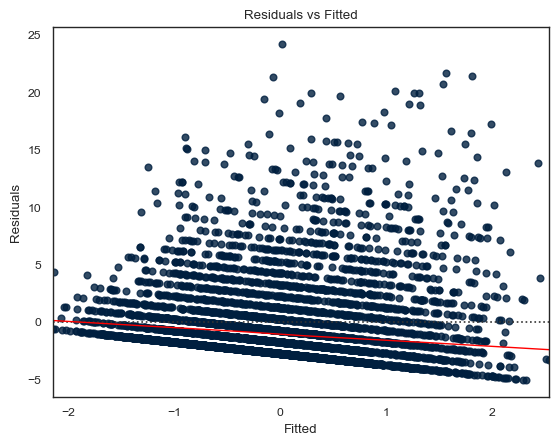

In [90]:
# criando gráfico residual x fitted
y = df_center["DPQ_RANK"]
fig, ax = plt.subplots(1, 1)

sns.residplot(x=res.fittedvalues, y=res.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

plt.show()


In [91]:
res.resid.mean()

2.804694422736593e-15

Uma das premsisas é a homocedasticidade. Pelo gráfico, essa premissa não está sendo seguida, contudo como o erro está muito próximo de zero, iremos continuar.

Agora iremos verificar se há autocorrelação nos resíduos

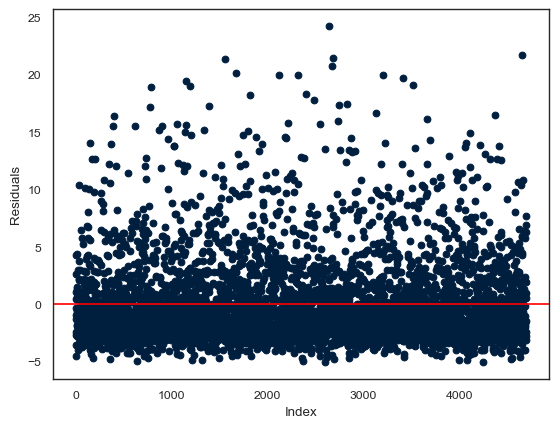

In [93]:
df_auto = res.resid.reset_index().rename(columns={0: "resid"})

plt.scatter(df_auto["index"] , df_auto["resid"])
plt.axhline(0, color='red')
plt.xlabel('Index');
plt.ylabel('Residuals');

In [94]:
durbin_watson(res.resid)

1.9973788248190947

Interpretação dos valores do teste de Durbin-Watson:

Um valor próximo de 2 sugere que não há autocorrelação nos resíduos.
Um valor menor que 2 sugere autocorrelação positiva.
Um valor maior que 2 sugere autocorrelação negativa.

Parece que não há evidência significativa de autocorrelação nos resíduos.

Por fim, verificaremos se os resíduos tem distribuição normal

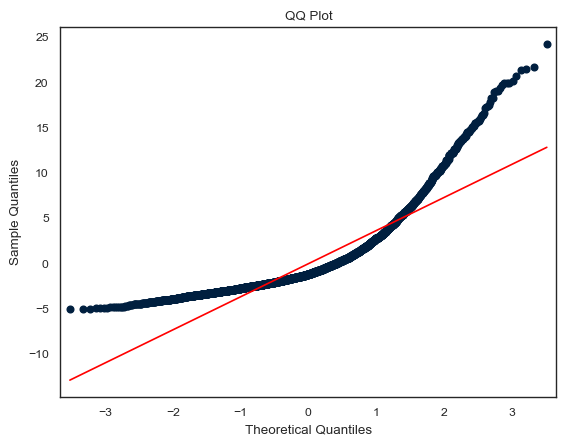

In [95]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(res.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

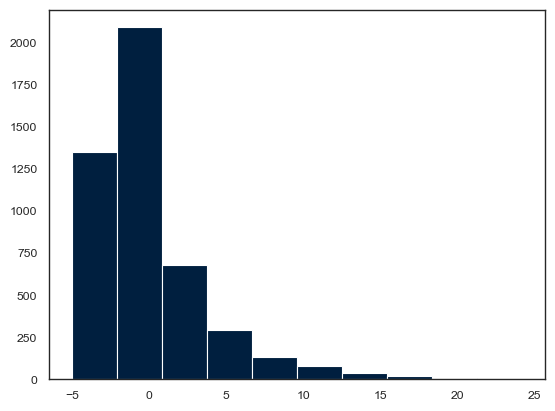

In [96]:
plt.hist(res.resid);

Nosso resíduo não tem uma distribuição normal, o que significa que os testes de hipótese que serão feitos (p-valores) não poderão ser 100% confiáveis.
Entretanto, todos os testes de hipótese que a regressão linear faz tem certa tolerância a não normalidade. Aqui, apesar dos dados não estarem normais, vamos violar essa regra sabendo que, se o p-valor for muito próximo a 0.05 devemos ficar bastante atentos pois está muito próximo a margem de rejeição!

In [97]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DPQ_RANK   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.55
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.19e-40
Time:                        18:44:47   Log-Likelihood:                -12756.
No. Observations:                4702   AIC:                         2.555e+04
Df Residuals:                    4681   BIC:                         2.569e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Conclusão

### Respostas às Perguntas Principais:

1. **Perfil Depressivo em Adultos maiores de 18 anos (2005-2006 nos EUA):** 
    - Gênero e depressão: Mulheres tendem a apresentar pontuações mais altas no DPQ_RANK, indicando uma maior incidência ou gravidade de sintomas depressivos em comparação aos homens.
    - Escolaridade e depressão: Pessoas com nível superior completo tendem a ter menor DPQ_RANK (menos sintomas depressivos) comparado a outros níveis de escolaridade.
    - Raça/etnia e depressão: Existem diferenças significativas no DPQ_RANK em função da raça/etnia, no entanto, um teste posterior sugere que essa diferença pode não ser substancial.
    - Renda e depressão: Indivíduos com renda muito baixa ou baixa apresentaram maior DPQ_RANK (mais sintomas depressivos) do que aqueles com renda alta ou muito alta.

2. **Estilo de Vida e Depressão:** 
    - Alimentação e depressão: Há uma correlação significativa entre a ingestão de proteínas, açúcar, e o score de alimentação saudável com o DPQ_RANK, embora essas correlações sejam fracas.
    - Atividade física e depressão: Há uma fraca correlação significativa entre a quantidade de exercício físico semanal e o DPQ_RANK.

### Insights Gerais:

- A idade apresenta correlação significativa com o score de alimentação saudável, mas não com a quantidade de atividade física.
- Há associações entre gênero, escolaridade, raça/etnia e renda com características distintas, demonstrando a complexidade das relações socioeconômicas e de estilo de vida com a saúde mental.
- Os testes chi-quadrado indicam associações significativas entre diversas variáveis categóricas, embora a magnitude destes efeitos muitas vezes seja pequena, como indicado pelo Coeficiente de Cramér (V).

### Futuras Melhorias:

- **Validação do Modelo:** Seria útil dividir o dataset em conjuntos de treino e teste para validar a capacidade de previsão do modelo.
- **Análise Multivariada:** Avaliar a interação entre diferentes variáveis (por exemplo, gênero e renda) em relação à depressão pode fornecer insights mais profundos.
- **Exploração Adicional:** Incluir mais variáveis relacionadas ao estilo de vida, como uso de álcool ou tabaco, para uma visão mais holística.
- **Intervenções Focadas:** Com base nos insights, desenvolver intervenções ou programas específicos para grupos de maior risco, como mulheres ou indivíduos com baixa renda.

Esta análise fornece uma visão abrangente das associações entre diversas características socioeconômicas, estilo de vida e saúde mental nos EUA durante o período de 2005-2006. É crucial que sejam realizados mais estudos para uma compreensão mais profunda, o que pode contribuir para estratégias mais eficazes de prevenção e tratamento da depressão.